In [ ]:
from fastai2.data.all import *
from fastai2.vision.core import *
from fastai2.vision.data import *

In [ ]:
source = untar_data(URLs.CIFAR)
images = get_image_files(source)
fn = images[0];fn

Path('C:/Users/t158185/.fastai/data/cifar10/test/airplane/1001_airplane.png')

# Transformation pipeline

In [ ]:
def plot_image(im, ax=None, figsize=None, title=None, ctx=None, **kwargs):
    ax = ifnone(ax, ctx)
    if figsize is None: figsize= (8, 8)
    if ax is None: _, ax = plt.subplots(figsize=figsize)
    ax.imshow(im, **kwargs)
    if title is not None: ax.set_title(title)
    ax.axis('off')
    

In [ ]:
class MyTensorImage(TensorImageBase):
    pass

In [ ]:
# Any class which has show method, can be used in transformation

class MyImage(Image.Image):
    _tensor_cls = MyTensorImage
    @classmethod
    def create(cls,fn:Path, **kwargs)->None:
        im = load_image(fn, **kwargs)
        im.__class__ = MyImage
        return im
        # It's just the PIL Image class just we drived it from that and type casted to super clas
        
    def show(self, ctx=None, **kwargs):
        " Show Image using merge(self._show_args, kwargs)"
        return plot_image(self, ctx=ctx , **kwargs)
    
@ToTensor
def encodes(self, o:MyImage): return o._tensor_cls(image2tensor(o))

# Pipeline transformation

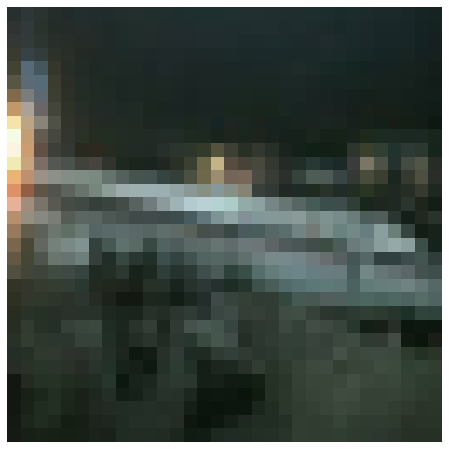

In [ ]:
img = MyImage.create(fn); img.show()

In [ ]:
pipeline = Pipeline([MyImage.create, ToTensor()])
a1 = pipeline(fn)

In [ ]:
type(a1),a1.shape

(__main__.MyTensorImage, torch.Size([3, 32, 32]))

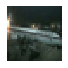

In [ ]:
pipeline.show(a1) # because TensorImageBase had a show method

In [ ]:
pipeline.decode(a1)

tensor([[[40, 46, 42,  ..., 25, 22, 21],
         [47, 50, 41,  ..., 24, 21, 22],
         [53, 51, 44,  ..., 23, 21, 23],
         ...,
         [18, 26, 33,  ..., 48, 42, 42],
         [20, 30, 33,  ..., 42, 42, 41],
         [21, 23, 23,  ..., 38, 38, 38]],

        [[48, 54, 51,  ..., 39, 36, 36],
         [51, 57, 50,  ..., 38, 35, 34],
         [55, 58, 53,  ..., 37, 34, 32],
         ...,
         [23, 33, 44,  ..., 57, 52, 54],
         [25, 38, 44,  ..., 50, 51, 52],
         [26, 32, 33,  ..., 48, 48, 48]],

        [[47, 55, 47,  ..., 40, 36, 33],
         [49, 58, 45,  ..., 39, 35, 32],
         [52, 58, 48,  ..., 38, 35, 32],
         ...,
         [17, 23, 32,  ..., 46, 41, 42],
         [19, 28, 32,  ..., 39, 40, 40],
         [20, 22, 22,  ..., 37, 37, 36]]], dtype=torch.uint8)

In [ ]:
parent_label(fn)

'airplane'

In [ ]:
pipe = Pipeline([parent_label, Categorize])
pipe.setup([parent_label(fn)])
a1 = pipe(fn)

In [ ]:
a1.data.cpu()

tensor(0, dtype=torch.int32)

In [ ]:
ta1 = torch.tensor(a1.data.cpu())

C:\Users\t158185\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [ ]:
type(ta1)

torch.Tensor

In [ ]:
import pdb
pdb.set_trace()
pipe.show(ta1)

--Return--
> <ipython-input-98-c7b7ab992f79>(2)<module>()->None
-> pdb.set_trace()
(Pdb) b retain_type
Breakpoint 7 at c:\users\t158185\appdata\local\continuum\anaconda3\lib\site-packages\fastcore\dispatch.py:153
(Pdb) c
> c:\users\t158185\appdata\local\continuum\anaconda3\lib\site-packages\fastcore\dispatch.py(156)retain_type()
-> if new is None: return
(Pdb) n
> c:\users\t158185\appdata\local\continuum\anaconda3\lib\site-packages\fastcore\dispatch.py(157)retain_type()
-> assert old is not None or typ is not None
(Pdb) n
> c:\users\t158185\appdata\local\continuum\anaconda3\lib\site-packages\fastcore\dispatch.py(158)retain_type()
-> if typ is None:
(Pdb) n
> c:\users\t158185\appdata\local\continuum\anaconda3\lib\site-packages\fastcore\dispatch.py(159)retain_type()
-> if not isinstance(old, type(new)): return new
(Pdb) old
tensor(0, dtype=torch.int32)
(Pdb) type(new)
<class 'fastai2.data.transforms.Category'>
(Pdb) isinstance(old,type(new))
False
(Pdb) n
--Return--
> c:\users\t158185\ap

BdbQuit: 

In [ ]:
type(pipe.decode(ta1))

fastai2.data.transforms.Category

In [ ]:
pipe.categorize.vocab

(#1) ['airplane']